# Shift-Only Time Warping

The `affinewarp` package supports two types of time warping: `PiecewiseWarping` and `ShiftWarping`. Here, we demonstrate `ShiftWarping` which is the simplest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Helper function for generating shifted data
from affinewarp.datasets import jittered_data

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



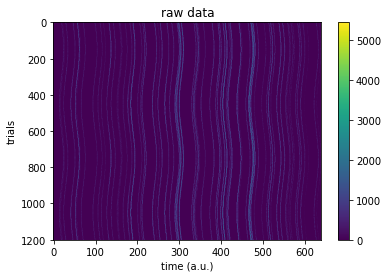

In [2]:
# load e-mouse data
data = np.load('/Users/shijiegu/Documents/Second-Year/EE290/Project/test_data/dummy_data1.npy').transpose()
data = np.reshape(data,(1201,-1,1))

# Plot data.
plt.imshow(np.squeeze(data), aspect='auto')
plt.title('raw data'), plt.xlabel('time (a.u.)'), plt.ylabel('trials')
plt.colorbar()

In [3]:
np.shape(data)

(1201, 640, 1)

 ### Fit model, plot reconstruction error over time.
 
Since the data is very noisy, we'll add a roughness penalty to the model template to damp down high-frequency noise. This isn't entirely necessary for this simple example, but can be useful in real datasets.

Loss: 34551.28: 100%|██████████| 25/25 [02:37<00:00,  6.30s/it]


Text(0, 0.5, 'model loss')

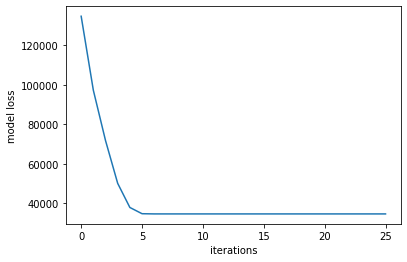

In [3]:
from affinewarp import ShiftWarping
from affinewarp import PiecewiseWarping
from affinewarp import ShiftWarping_PCA

# Create the model. Add a roughness penalty to the model template.
model = ShiftWarping_PCA(maxlag=.3, smoothness_reg_scale=0)
#model = PiecewiseWarping(n_knots=2, smoothness_reg_scale=10.)

# Fit the model.
model.fit(data, iterations=25)

# Plot model learning curve.
plt.plot(model.loss_hist)
plt.xlabel('iterations')
plt.ylabel('model loss')

Loss: 58900.80: 100%|██████████| 20/20 [00:03<00:00,  5.50it/s]


Text(0, 0.5, 'model loss')

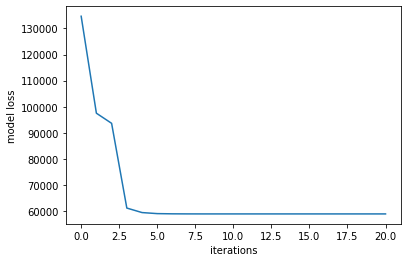

In [16]:
# Create the model. Add a roughness penalty to the model template.
model = ShiftWarping(maxlag=.3, smoothness_reg_scale=0)
#model = PiecewiseWarping(n_knots=2, smoothness_reg_scale=10.)

# Fit the model.
model.fit(data, iterations=20)

# Plot model learning curve.
plt.plot(model.loss_hist)
plt.xlabel('iterations')
plt.ylabel('model loss')

In [4]:
from affinewarp import shiftwarp_shijie
T=640
N=1
r=1
WtW = np.zeros((3, T))
WtX = np.zeros((T, N))
shiftwarp_shijie._fill_WtW(model.shifts, model.amps[:,r]**2, WtW[-1])
res=np.squeeze(data)-model.predict_wo_r(r)
shiftwarp_shijie._fill_WtX(res, model.shifts, model.amps[:,r], WtX)
            

IndexError: index 1 is out of bounds for axis 1 with size 1

### Plot the model estimate of the data

Note that the model estimate is denoised compared to the raw data we plotted above.

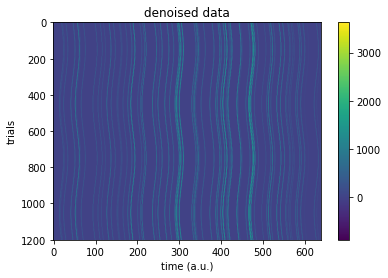

In [4]:
plt.imshow(model.predict().squeeze(), aspect='auto')
plt.title('denoised data'), plt.xlabel('time (a.u.)'), plt.ylabel('trials')
plt.colorbar()

### Apply the learned warping functions to align the data across trials

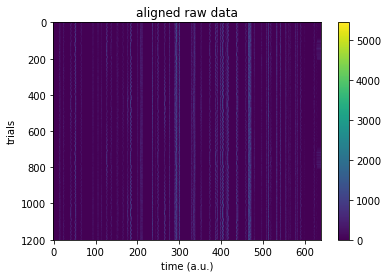

In [5]:
plt.imshow(model.transform(data).squeeze(), aspect='auto')
plt.title('aligned raw data'), plt.xlabel('time (a.u.)'), plt.ylabel('trials')
plt.colorbar();

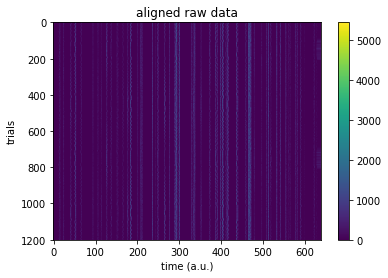

In [13]:
plt.imshow(model.transform(data).squeeze(), aspect='auto')
plt.title('aligned raw data'), plt.xlabel('time (a.u.)'), plt.ylabel('trials')
plt.colorbar();

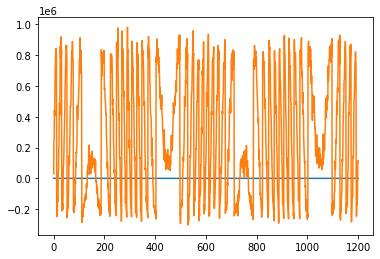

In [7]:
plt.plot(model.amps[:,0])
plt.plot(model.amps[:,1])

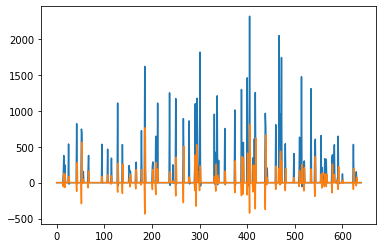

In [10]:
plt.plot(model.template[:,0,0]*np.mean(model.amps[:,0]))
plt.plot(model.template[:,0,1]*np.mean(model.amps[:,1]))

### We can also plot the model template across all trials

This corresponds to the model's estimate in the warped/aligned temporal domain.

TypeError: Invalid shape (6005, 1, 640) for image data

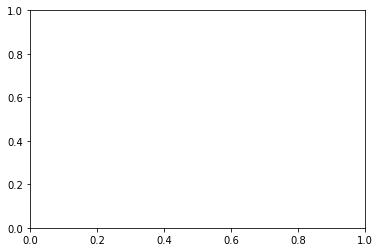

In [6]:
plt.imshow(np.tile(model.template, (1, data.shape[0])).T, aspect='auto')
plt.title('aligned denoised data'), plt.xlabel('time (a.u.)'), plt.ylabel('trials')
plt.colorbar();

### Simply trial-averaging over the raw data gives a smeared-out PSTH.

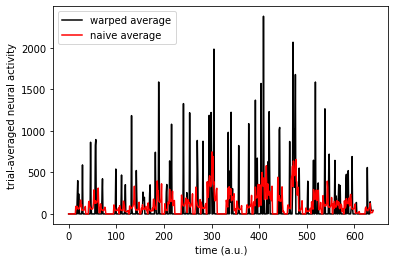

In [11]:
plt.plot(model.transform(data)[:,:,0].mean(axis=0), color='k', label='warped average')
plt.plot(data.mean(axis=0), color='r', label='naive average')
plt.ylabel('trial-averaged neural activity'), plt.xlabel('time (a.u.)'), plt.legend();

### Plot the model template vs the warped trial average

The model template is smoother because we added a roughness penalty (not present when we average over the aligned data).

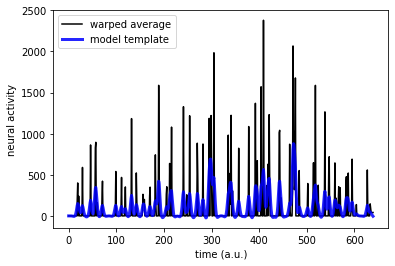

In [12]:
plt.plot(model.transform(data)[:,:,0].mean(axis=0), color='k', label='warped average')
plt.plot(model.template, '-', color='b', label='model template', lw=3, alpha=.85)
plt.ylabel('neural activity'), plt.xlabel('time (a.u.)'), plt.legend();

# A note on cross-validation

In this basic example, we only considered a single neuron over multiple trials. In general, it is advisable to apply these methods to larger populations of simultaneously recorded neurons. This enables various cross-validation schemes---e.g. by fitting the model to a subset of neurons and visualizing the aligned activity of held out cells.